## Comparing Decision Tree and Random Forest Classifiers on Wine quality dataset, with the same training and test data.

### Libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
wine = pd.read_csv("winequality-red.csv", delimiter=';')

### Exploring the data

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


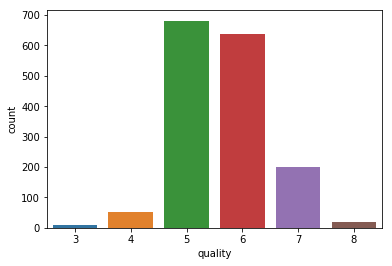

In [7]:
sns.countplot('quality', data = wine)

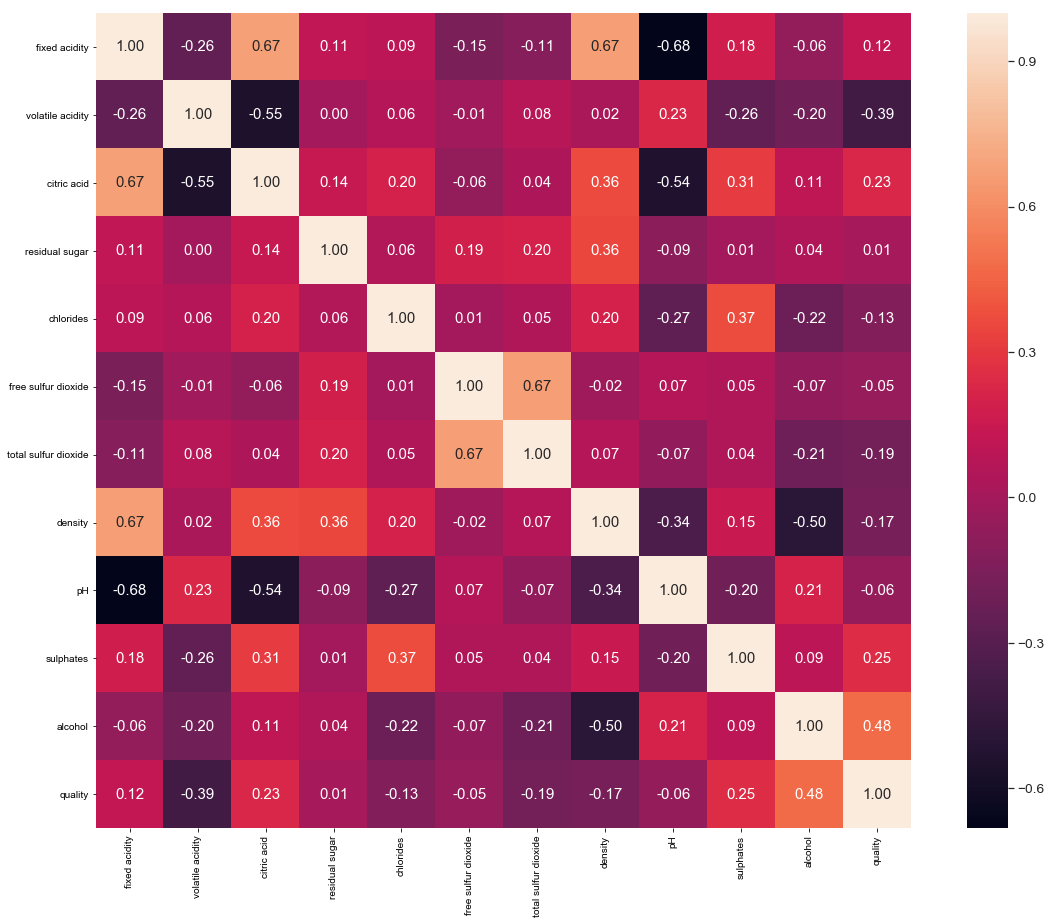

In [8]:
plt.subplots(figsize=(20,15))
corrmat = wine.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine.columns.values, xticklabels=wine.columns.values)
plt.show()

In [9]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [10]:
indexBad = wine.loc[wine['quality'] <= 6].index

In [11]:
indexGood = wine.loc[wine['quality'] > 6].index

In [12]:
wine.iloc[indexBad, wine.columns.get_loc('quality')] = 0

In [13]:
wine.iloc[indexGood, wine.columns.get_loc('quality')] = 1

In [14]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Model building and Evaluation : Decision tree

In [15]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 62) 

In [17]:
# Building  decision tree with 2 levels
clf_tree = tree.DecisionTreeClassifier(max_depth=2)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_pred = clf_tree.predict(X_test)

In [19]:
# r-square value
r2_score(y_test, y_pred)

0.05160608787511256

In [20]:
# mean squared error
mean_squared_error(y_test, y_pred)

0.10520833333333333

In [21]:
accuracy_score(y_test, y_pred)

0.8947916666666667

### Model building and Evaluation : Random Forest

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred_rf = rf.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred_rf)

0.9052083333333333

In [26]:
# r-square value
r2_score(y_test, y_pred_rf)

0.14550647521421034

In [27]:
# mean squared error
mean_squared_error(y_test, y_pred_rf)

0.09479166666666666

### The accuracy of Random Forest classifier is higher and the r-suared value and MSE lower, as compared to the Decision tree classifier.